In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ip

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_mfcc.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_mfcc.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_mfcc.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_mfcc.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 40), (4499, 1), (4233, 41), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test)

In [6]:
X_test = X_test.iloc[:,1:41]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0], 40, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.LSTM(
         units=128,activation='relu',
         return_sequences=True,
         input_shape=(40,1)
     ),
     tf.keras.layers.LSTM(
         units=64,activation='relu'
     ),
     tf.keras.layers.Dense(
         units=32,
         activation='relu'
     ),

     tf.keras.layers.Dense(
         units=10,
         activation='softmax'
     )

    ]
)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________


In [9]:
print("Train...")
model_mfcc=model.fit(X_train, y_train, batch_size=256, epochs=250, validation_data=(X_test, y_test))

Train...
Epoch 1/250
18/18 [==============================] - 23s 855ms/step - loss: 2.2723 - accuracy: 0.1387 - val_loss: 2.2489 - val_accuracy: 0.1160
Epoch 2/250
18/18 [==============================] - 14s 769ms/step - loss: 2.1942 - accuracy: 0.1703 - val_loss: 2.2105 - val_accuracy: 0.1358
Epoch 3/250
18/18 [==============================] - 14s 762ms/step - loss: 2.1457 - accuracy: 0.1945 - val_loss: 2.2339 - val_accuracy: 0.1401
Epoch 4/250
18/18 [==============================] - 14s 806ms/step - loss: 2.2621 - accuracy: 0.1992 - val_loss: 2.2108 - val_accuracy: 0.1465
Epoch 5/250
18/18 [==============================] - 14s 804ms/step - loss: 2.1911 - accuracy: 0.1845 - val_loss: 2.1872 - val_accuracy: 0.1552
Epoch 6/250
18/18 [==============================] - 14s 777ms/step - loss: 2.1357 - accuracy: 0.2274 - val_loss: 2.1396 - val_accuracy: 0.2046
Epoch 7/250
18/18 [==============================] - 15s 834ms/step - loss: 2.1284 - accuracy: 0.2049 - val_loss: 2.2064 - val_

Epoch 58/250
18/18 [==============================] - 9s 503ms/step - loss: 2.1094 - accuracy: 0.3603 - val_loss: 2.0271 - val_accuracy: 0.2466
Epoch 59/250
18/18 [==============================] - 9s 484ms/step - loss: 1.7955 - accuracy: 0.3761 - val_loss: 1.9360 - val_accuracy: 0.3156
Epoch 60/250
18/18 [==============================] - 9s 525ms/step - loss: 1.5188 - accuracy: 0.4725 - val_loss: 1.9503 - val_accuracy: 0.3782
Epoch 61/250
18/18 [==============================] - 9s 506ms/step - loss: 1.3181 - accuracy: 0.5655 - val_loss: 1.8673 - val_accuracy: 0.3992
Epoch 62/250
18/18 [==============================] - 9s 505ms/step - loss: 1.1855 - accuracy: 0.6055 - val_loss: 1.9086 - val_accuracy: 0.4056
Epoch 63/250
18/18 [==============================] - 9s 505ms/step - loss: 1.1061 - accuracy: 0.6275 - val_loss: 2.0113 - val_accuracy: 0.3969
Epoch 64/250
18/18 [==============================] - 9s 485ms/step - loss: 1.0409 - accuracy: 0.6495 - val_loss: 2.0377 - val_accuracy:

Epoch 115/250
18/18 [==============================] - 9s 485ms/step - loss: 0.5492 - accuracy: 0.8082 - val_loss: 2.8141 - val_accuracy: 0.3806
Epoch 116/250
18/18 [==============================] - 10s 543ms/step - loss: 0.5864 - accuracy: 0.7991 - val_loss: 2.7610 - val_accuracy: 0.3700
Epoch 117/250
18/18 [==============================] - 10s 556ms/step - loss: 0.5879 - accuracy: 0.7924 - val_loss: 3.2033 - val_accuracy: 0.3775
Epoch 118/250
18/18 [==============================] - 8s 464ms/step - loss: 0.6659 - accuracy: 0.7715 - val_loss: 2.8316 - val_accuracy: 0.3508
Epoch 119/250
18/18 [==============================] - 9s 519ms/step - loss: 0.5923 - accuracy: 0.7960 - val_loss: 2.9556 - val_accuracy: 0.3744
Epoch 120/250
18/18 [==============================] - 8s 477ms/step - loss: 0.5464 - accuracy: 0.8088 - val_loss: 3.1431 - val_accuracy: 0.3525
Epoch 121/250
18/18 [==============================] - 9s 515ms/step - loss: 0.5729 - accuracy: 0.7986 - val_loss: 2.9474 - val_

18/18 [==============================] - 10s 567ms/step - loss: 0.3218 - accuracy: 0.8902 - val_loss: 4.0332 - val_accuracy: 0.3749
Epoch 172/250
18/18 [==============================] - 9s 513ms/step - loss: 0.3077 - accuracy: 0.8926 - val_loss: 4.0807 - val_accuracy: 0.3931
Epoch 173/250
18/18 [==============================] - 8s 469ms/step - loss: 0.2857 - accuracy: 0.9064 - val_loss: 4.3467 - val_accuracy: 0.3789
Epoch 174/250
18/18 [==============================] - 9s 508ms/step - loss: 0.3041 - accuracy: 0.8933 - val_loss: 4.1467 - val_accuracy: 0.3737
Epoch 175/250
18/18 [==============================] - 8s 471ms/step - loss: 0.3259 - accuracy: 0.8893 - val_loss: 4.1425 - val_accuracy: 0.3789
Epoch 176/250
18/18 [==============================] - 10s 590ms/step - loss: 0.3387 - accuracy: 0.8798 - val_loss: 4.0990 - val_accuracy: 0.3607
Epoch 177/250
18/18 [==============================] - 10s 580ms/step - loss: 0.3204 - accuracy: 0.8915 - val_loss: 4.0086 - val_accuracy: 0.3

18/18 [==============================] - 9s 513ms/step - loss: 0.1451 - accuracy: 0.9513 - val_loss: 5.1957 - val_accuracy: 0.3681
Epoch 228/250
18/18 [==============================] - 10s 564ms/step - loss: 0.1270 - accuracy: 0.9593 - val_loss: 5.4951 - val_accuracy: 0.3638
Epoch 229/250
18/18 [==============================] - 9s 525ms/step - loss: 0.1438 - accuracy: 0.9564 - val_loss: 5.6228 - val_accuracy: 0.3692
Epoch 230/250
18/18 [==============================] - 9s 497ms/step - loss: 0.1263 - accuracy: 0.9589 - val_loss: 5.3241 - val_accuracy: 0.3829
Epoch 231/250
18/18 [==============================] - 9s 536ms/step - loss: 0.1410 - accuracy: 0.9529 - val_loss: 4.9966 - val_accuracy: 0.3874
Epoch 232/250
18/18 [==============================] - 9s 516ms/step - loss: 0.1675 - accuracy: 0.9433 - val_loss: 5.2177 - val_accuracy: 0.3832
Epoch 233/250
18/18 [==============================] - 13s 730ms/step - loss: 0.1722 - accuracy: 0.9418 - val_loss: 4.9765 - val_accuracy: 0.38

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________
133/133 [==============================] - 9s 52ms/step - loss: 5.3056 - accuracy: 0.3962
Pre-training accuracy: 39.6173%


In [11]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9655479192733765
Testing Accuracy:  0.3961729407310486


In [12]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.3961729407310486


In [13]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[8 2 8 ... 9 9 2]


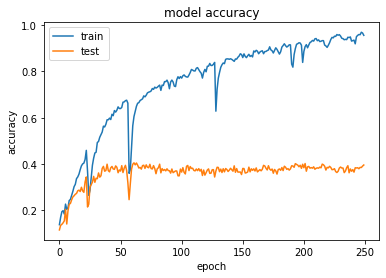

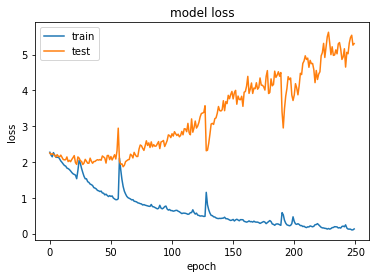

In [14]:
# summarize history for accuracy
plt.plot(model_mfcc.history['accuracy'])
plt.plot(model_mfcc.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_mfcc.history['loss'])
plt.plot(model_mfcc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
#Avg Test accuracy and Standart Devision 

In [16]:
train_hist = pd.DataFrame(model_mfcc.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.272289,0.138697,2.248923,0.115993
1,2.194234,0.170260,2.210499,0.135837
2,2.145681,0.194488,2.233885,0.140090
3,2.262141,0.199155,2.210757,0.146468
4,2.191116,0.184485,2.187171,0.155209
...,...,...,...,...
245,0.125572,0.959547,5.318425,0.380109
246,0.124877,0.958658,5.475393,0.386015
247,0.104186,0.969326,5.539134,0.385306
248,0.105394,0.965992,5.263004,0.391448


In [17]:
print(train_hist["val_accuracy"].describe())

count    250.000000
mean       0.361443
std        0.050286
min        0.115993
25%        0.364576
50%        0.376919
75%        0.384538
max        0.405622
Name: val_accuracy, dtype: float64


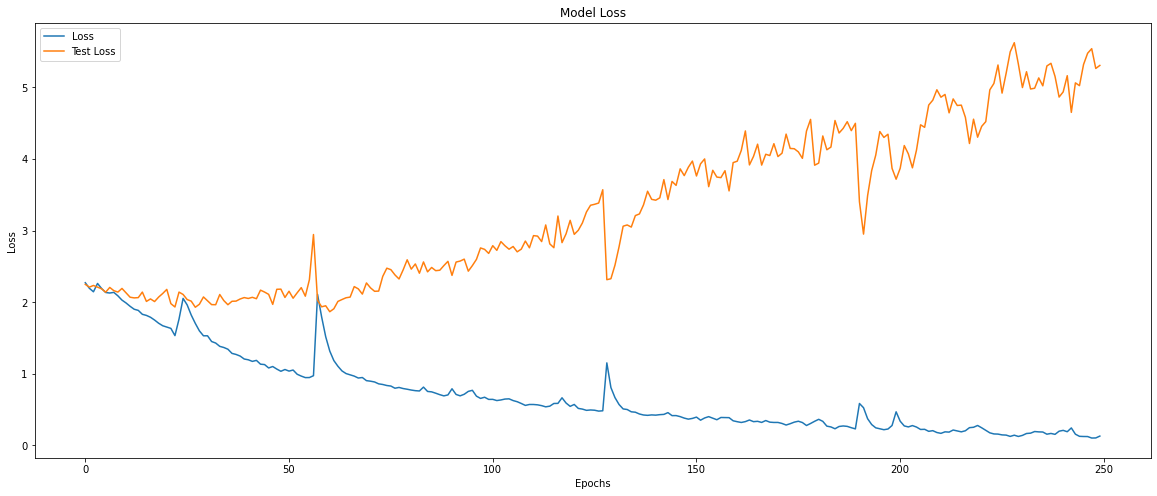

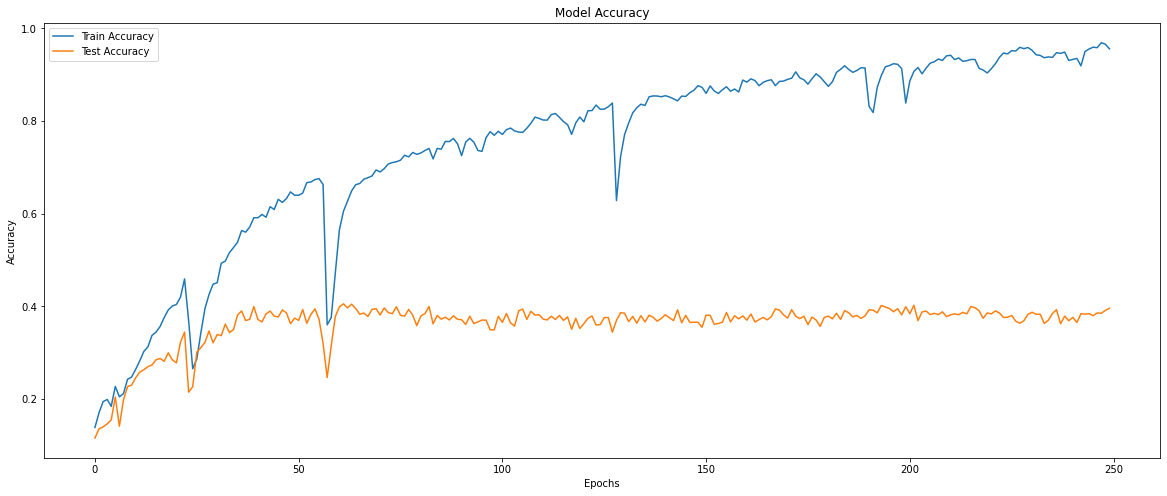

In [18]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [19]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[150   8  53  40  47  55   7  60  44  36]
 [  3 145   9   2   9   5   0   8   7  33]
 [ 31   1 190  93  19  22  25   0  71  48]
 [ 13   3 101 245  27   5  11   7  57  31]
 [ 19  23  52  65 126  26   8  90  30  61]
 [ 69   5  26  87  14 183   3  21   7  68]
 [  3   0  50  28   2   1  79   0   6  15]
 [ 16  41  13  14  86   8   0 158  78  38]
 [ 25   6  52  82  14   2   5   2 182  23]
 [ 41  18  49  32  41  10   6  40  44 219]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.41      0.30      0.34       500
           1       0.58      0.66      0.62       221
           2       0.32      0.38      0.35       500
           3       0.36      0.49      0.41       500
           4       0.33      0.25      0.28       500
           5       0.58      0.38      0.46       483
           6       0.55      0.43      0.48       184
           7       0.41      0.35      0.38       452
           8       0.35      0.